In [1]:
import cv2
import numpy as np
import sys
import os 
from pdf2image import convert_from_path
import easyocr
import csv
import matplotlib.pyplot as plt

In [2]:
def set_working_directory():
    # 當程式被 PyInstaller 打包時
    if hasattr(sys, '_MEIPASS'):
        # 設置工作目錄為可執行文件所在的目錄
        exe_dir = os.path.dirname(os.path.abspath(sys.executable))
    else:
        # 當程式在開發環境中執行時
        exe_dir = os.path.dirname(os.path.abspath(__file__))
        # 回到上一層目錄，即專案根目錄
        exe_dir = os.path.dirname(exe_dir)

    # 設置工作目錄為可執行文件所在的目錄
    os.chdir(exe_dir)

    return os.getcwd()



In [28]:
image = convert_from_path('./final_rgb.pdf', dpi =300, poppler_path="..\\..\\poppler-24.02.0\\Library\\bin")

In [29]:
img = np.asarray(image[0])

# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

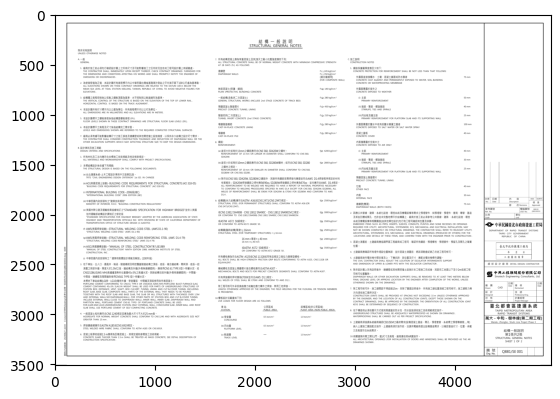

In [12]:
plt.imshow(img_gray, cmap='gray')

In [30]:
reader = easyocr.Reader(['ch_tra','en'])

# bounds = reader.readtext(img_gray, detail=1)
bounds = reader.readtext(img, detail=1)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


KeyboardInterrupt: 

In [27]:
# final_bl
for index in bounds:
  print(index[1])

結 構一般說 明
STRUCTURAL GE IERAL WOTES
除非另有說明
UllLESS OTHER IISE HOTED
般
所有結構混凝土應為常重混凝土且其28天之最小抗壓強度應如下列:
.施工說明
GEl IERAL
ALL STRUCTURAL COHCRETE SHALL BE OF HORMAL WEIGHT COHCRETE WITH MlHllUM COMPRESSIE STREIIGTH
COlSTRUCTIOI/ HlOTES
AT 28 DA/S fc AS F0[_01/$:
廠商於施工前必須先行確認設計圖上之所有尺寸及可能影響施工之任何狀況並告知工程司設計圖上有疑義處
鋼筋保護層厚度應至少如下:
THE COllTRACTOR SHALL IMMMEDIATEL{ UPOIl RECEIPT THEREOF
CHECK COllTRACT DRAiilHlGS
FURIISHED FOR
連續壁
f'c2 245 kgf/cm2
COllCRETE PROTECTIOII FOR REIHFORCEI EIIT SHALL BE HOT LESS THAII THAT FOLLO iS:
THE DIMEIISlOlS AllD COliDITlOliS AFFECTIIIG HIS ORKS AllD SHALL PROMPTL/ MOTIF/ THE ElGIlIEER OF
DlAPHRAGM WALLS
350 kgf/cm2
OlilSSl0iIS OR DISCREPAIICIES
合牆適用
外露面直接接觸水`土壤`混凝土舖面或防水膜者
T5 mm
FOR COMPOSITE IALL
COllCRETE CAST AGAIlST AllD PERMAlIElITL| EXPOSED TO WATER SOlL
BLllID|||6
2.
為使高程值為正值
本設計圖所有高程標示均以中華民國台灣省基隆潮汐測站之平均海平面下100公尺處為基準點
COllCRETE OR WATERPROOFIIIG MEMBRAlIE
ALL ELE ATlOlS SHOlll Oll THESE COllTRACT DRAWIHGS ARE RELATED TO THE DATUM 1OO m BELOlI THE
MEAI4 SEA 

In [23]:
# final_rgb
for index in bounds:
  print(index[1])

結 構 一般_說 明
STRUCTURAL GENERAL NOTES
除非另有說明
UNLESS OTHERWISE NOTED
所有結構混凝土應為常重混凝土且其28天之最小抗壓強度應如下列:
施工說咀
GENERAL
ALL STRUCTURAL CONCRETE SHALL BE OF NORMAL WEIGHT CONCRETE WITH MINIMUM COMPRESSIVE STRENGTH
CONSTRUCTION NOTES
AT 28 DAYS (fc) AS FOLL0W$:
廠商於施
須先行確認設計圖上之所有尺寸及可能
響施工之任何狀況並告知工程司設詐
有疑義處
鋼筋保
旱度應全0如
THE CONTRACTOR SHALL IMMEDIATELY UPON RECEIPT THEREOF,
CHECK CONTRACT DRAWINGS
FURNISHED FOR
連續壁
f'c2 245 kgf/cm2
CONCRETE PROTECTION FOR REINFORCEMENT SHALL BE NOT LESS THAN THAT FOLLOWS:
THE DIMENSIONS AND CONDITIONS AFFECTING HIS WORKS AND SHALL PROMPTLY NOTIFY THE ENGINEER OF
DIAPHRAGM WALLS
f'c2 350 kgf/cm2
OMISSIONS OR DISCREPANCIES
露匠自
舖面或防水膜
75 mm
(FOR COMPOSITE WALL)
CONCRETE CAST AGAINST AND PERMANENTLY EXPOSED TO WATER SOIL BLINDING
2.為使高程值為正值
所有高程標示均以中華民國台灣省基隆潮汐測站之平均海平面下100公尺處為基準點
CONCRETE OR WATERPROOFING MEMBRANE
ALL ELEVATIONS SHOWN ON THESE CONTRACT DRAWINGS ARE RELATED TO THE DATUM lo0 m BELOW THE
MEAN SEA LEVEL AT TIDAL STATION KEELUNG
TAIWAN, REPUBLIC OF CHINA TO AV

In [6]:
import re
def get_the_num(string):
  x = []
  for j,k in enumerate(string):
    if k == ' ' or k == '=' :
      x.append(j)
  if len(x) < 2:
    x.append(x[0])
    for c,w in enumerate(string):
      if w == '2':
        x[0] = c
        break
  return string[x[0]+1 : x[1]]

def check_is_right(string):
    pattern = r'(\d+)\s*kgf/cm2'
    match = re.search(pattern, string)
    if match:
        return int(match.group(1))
    else:
        return None
        
def extrct_data(bounds):
        s_big_word = '直徑大於'
        s_small_word = '直徑小於'
        result_dic = {'Concrete Strength':{'strength1':'0', 'strength2':'0'},
                          'Rebar Strength':{'strength1':'0', 'strength2':'0'}}

        lengths_of_bounds = len(bounds)
        
        for i in range(lengths_of_bounds):
            # check rebar strength 1
            if bounds[i][1].find(s_big_word) > -1:
                s_big_start = i
                while True:
                    if (bounds[s_big_start][1].upper()).find('KGF') > -1:
                        result_dic["Rebar Strength"]['strength1'] = get_the_num(bounds[s_big_start][1])
                        print(f'rebar strength 1: {result_dic["Rebar Strength"]["strength1"]}')
                        break  
                    s_big_start += 1
            

            # check rebar strength 2
            if bounds[i][1].find(s_small_word) > -1:
                s_small_start = i
                while True:
                    if (bounds[s_small_start][1].upper()).find('KGF') > -1:
                        result_dic["Rebar Strength"]['strength2'] = get_the_num(bounds[s_small_start][1])
                        print(f'rebar strength 2: {result_dic["Rebar Strength"]["strength2"]}')
                        break
                    s_small_start += 1
            

            # check wall strength1
            if bounds[i][1].find('最小抗壓強度') > -1:
                search_index = i
                while True:
                    if bounds[search_index][1].find('連續壁') > -1:
                        
                        check = check_is_right(bounds[search_index+1][1])
                        if check:
                            result_dic["Concrete Strength"]['strength1'] = check
                            print(f'wall strength1: {result_dic["Concrete Strength"]["strength1"]}')
                    if bounds[search_index][1].find('WALLS') > -1:
                        check = check_is_right(bounds[search_index+1][1])
                        if check:
                            result_dic["Concrete Strength"]['strength2'] = check
                            print(f'wall strength2: {result_dic["Concrete Strength"]["strength2"]}')
                        break
                    search_index += 1

        return result_dic

result_dic = extrct_data(bounds)
print(result_dic)

wall strength1: 245
wall strength2: 350
rebar strength 1: 4200
rebar strength 2: 2800
{'Concrete Strength': {'strength1': 245, 'strength2': 350}, 'Rebar Strength': {'strength1': '4200', 'strength2': '2800'}}


In [13]:

def extract_number(text):
    pattern = r'(\d+)\s*kgf/cm2'
    match = re.search(pattern, text)
    if match:
        return int(match.group(1))
    else:
        return None

# 使用範例
text = "f'c2 245 kgf/cm^2"
result = extract_number(text)
print(result)  # 輸出: 245

245
